# Assignment 3 - A20503736 Girish Rajani




Due by 11:59pm, Apr. 23, 2023

## Theory Questions (Question 1: 5 points, Question 2: 5 points, Question 3: 10 points)

***

1. Suppose I is 5X5 image, K is a filter. Compute the convolution of the image I with K, stride =1.

I:

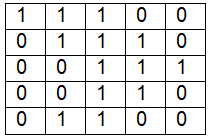

K:

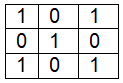

a)With zero padding.

b)Without padding.






**Answer:**

1a) with zero padding:

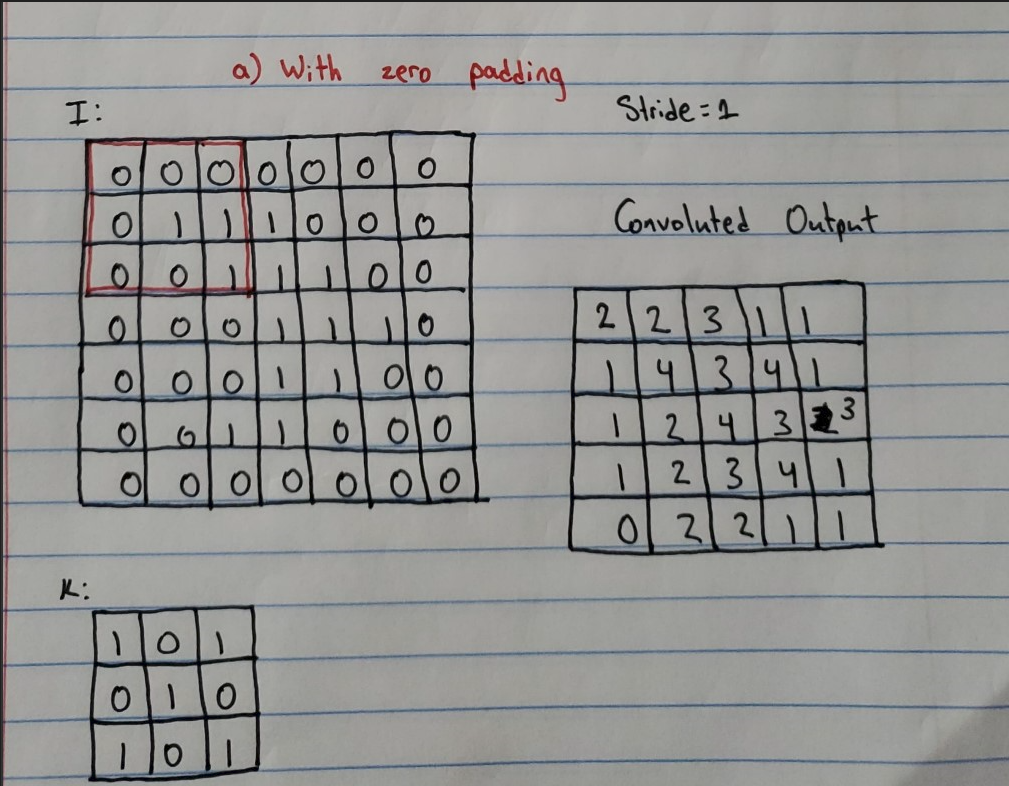  

1b) without zero padding:

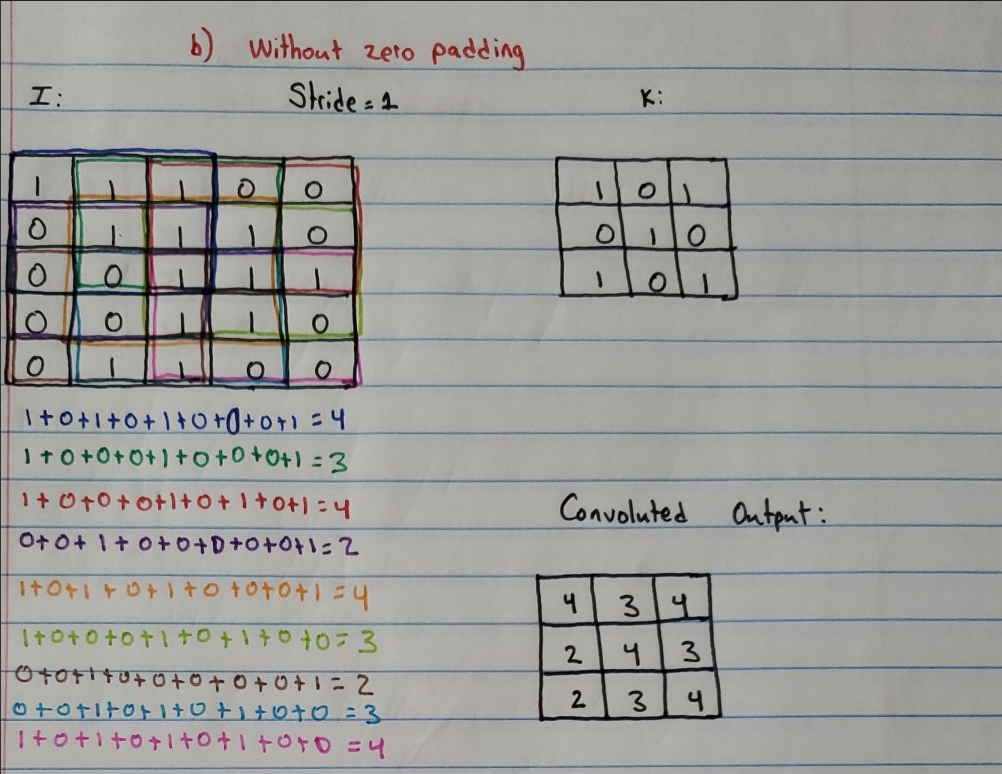 

2.Let I be the input. Write the output using max pooling with 2X2 filter, stride = 2.

I:
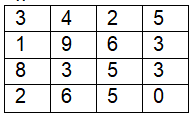




**Answer:**

2) 

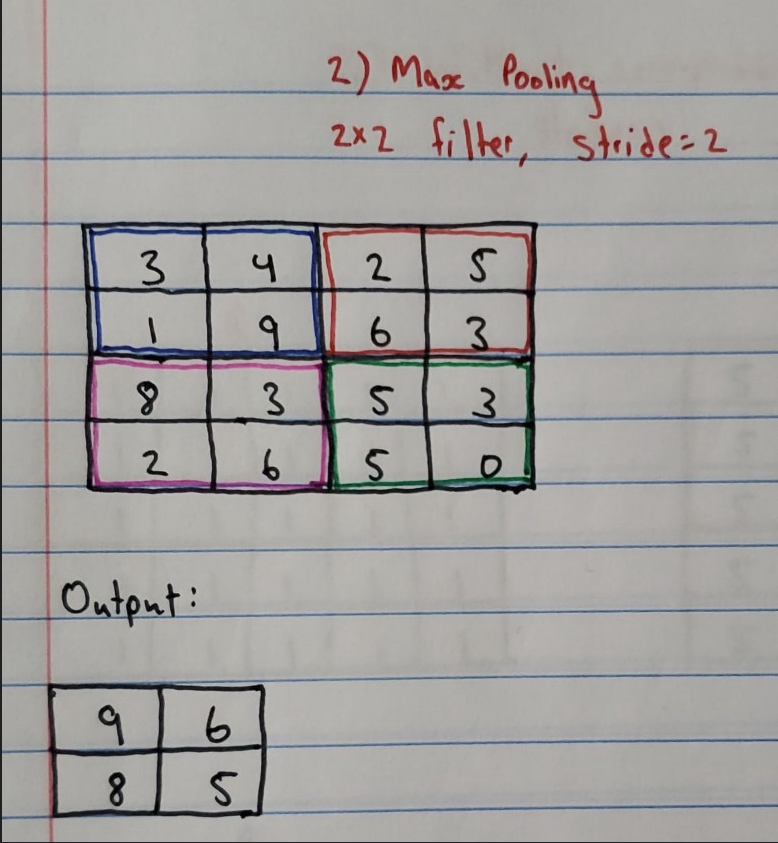

3.Let I be the 5X5 RGB image. K is a 3X3 filter having all 1s. 

For the R channel, we have,
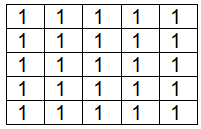

For the G channel, we have,
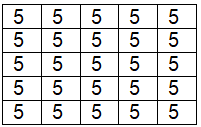

For the B channel, we have,
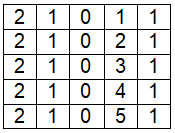

Compute the convolution of I with K, stride = 1, without padding.




**Answer:**

3)

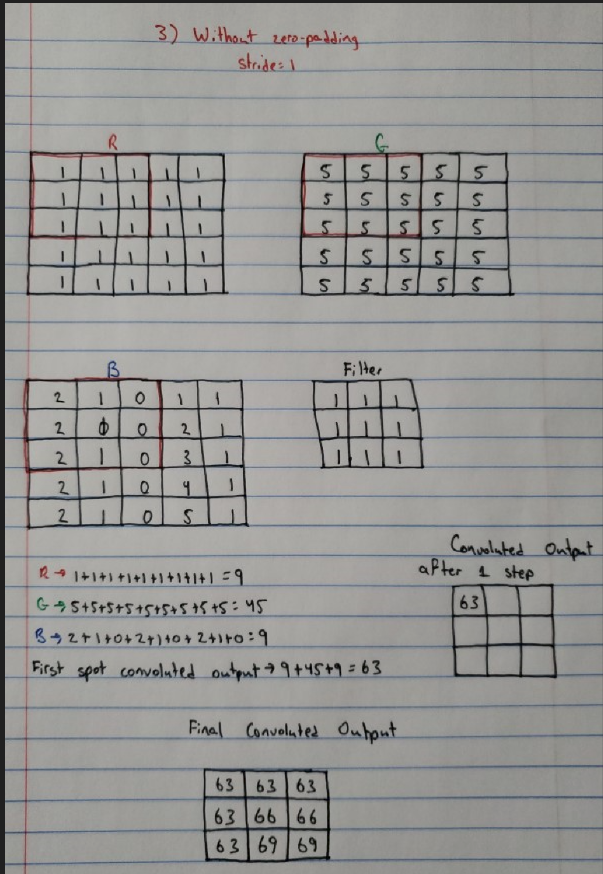

## Programming Questions (Question 4: 50 points, Question 5, 30 points)

4.Load mnist dataset. Normalize the data. Split the data into training, validation and testing set. 

(1) Build the sequential classification with several dense layers. Don’t use convolution layers. 

Plot the training loss and validation loss as a function of epochs.

Plot the both training accuracy and validation accuracy as a function of epochs. 

Print the testing accuracy.

(2)Build a CNN network with convolution layers, pooling layers to classify the number.  

Plot the training loss and validation loss as a function of epochs.

Plot the both training accuracy and validation accuracy as a function of epochs. 

Print the testing accuracy. Compare to the previous result.



In [192]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras import models, layers, optimizers
import matplotlib.pyplot as plt

In [193]:

#Load mnist dataset
(train_data,train_labels),(test_data,test_labels) = mnist.load_data()

#Print length of training and testing data and shape of images
print("Shape of training data:", train_data.shape)
print("Shape of testing data:", test_data.shape)

Shape of training data: (60000, 28, 28)
Shape of testing data: (10000, 28, 28)


In [194]:
#vectorize training and testing data 
train_data_dense = train_data.reshape((60000, 28 * 28))
train_data_dense = train_data_dense.astype('float32')
train_data_dense = train_data_dense/255.0

test_data_dense = test_data.reshape((10000, 28 * 28))
test_data_dense = test_data_dense.astype('float32')
test_data_dense = test_data_dense/255.0

#vectorize labels using categorical encoding
train_labels_dense = to_categorical(train_labels)
test_labels_dense = to_categorical(test_labels)

#Create validation set from training data (10,000 samples for validation, 50,000 for training)
train_val_dense = train_data_dense[:10000]
partial_train_data_dense = train_data_dense[10000:]
label_val_dense = train_labels_dense[:10000]
partial_train_labels_dense = train_labels_dense[10000:]

#Print length of training, validation and testing data
print("Length of training data:", len(partial_train_data_dense))
print("Length of validation data:", len(train_val_dense))
print("Length of testing data:", len(test_data_dense))

Length of training data: 50000
Length of validation data: 10000
Length of testing data: 10000


In [ ]:
########################## Sequential Classification using Dense Layers #############################

In [195]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 32)                25120     
                                                                 
 dense_93 (Dense)            (None, 16)                528       
                                                                 
 dense_94 (Dense)            (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [196]:
#compile model with optimizer, lr, loss, and metric
model.compile(
    optimizers.RMSprop(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [197]:
#train model for 5 epochs using a batch size of 64
history = model.fit(partial_train_data_dense, partial_train_labels_dense,
epochs=5, batch_size=64,
validation_data=(train_val_dense, label_val_dense))

Epoch 1/5
782/782 [==============================] - 4s 5ms/step - loss: 0.4958 - accuracy: 0.8600 - val_loss: 0.2641 - val_accuracy: 0.9263
Epoch 2/5
782/782 [==============================] - 4s 5ms/step - loss: 0.2155 - accuracy: 0.9380 - val_loss: 0.2262 - val_accuracy: 0.9323
Epoch 3/5
782/782 [==============================] - 4s 6ms/step - loss: 0.1706 - accuracy: 0.9499 - val_loss: 0.1684 - val_accuracy: 0.9509
Epoch 4/5
782/782 [==============================] - 4s 6ms/step - loss: 0.1440 - accuracy: 0.9579 - val_loss: 0.1670 - val_accuracy: 0.9500
Epoch 5/5
782/782 [==============================] - 4s 5ms/step - loss: 0.1283 - accuracy: 0.9621 - val_loss: 0.1651 - val_accuracy: 0.9540


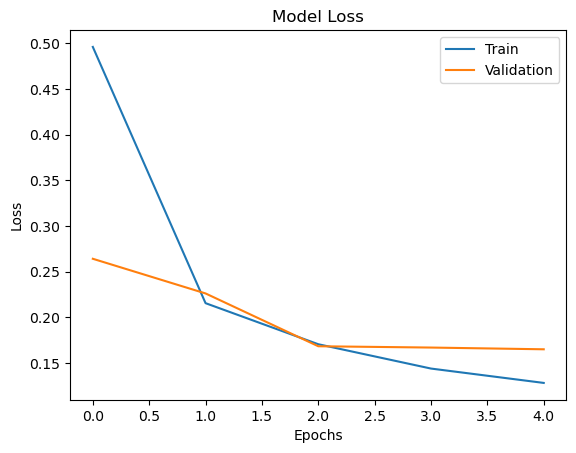

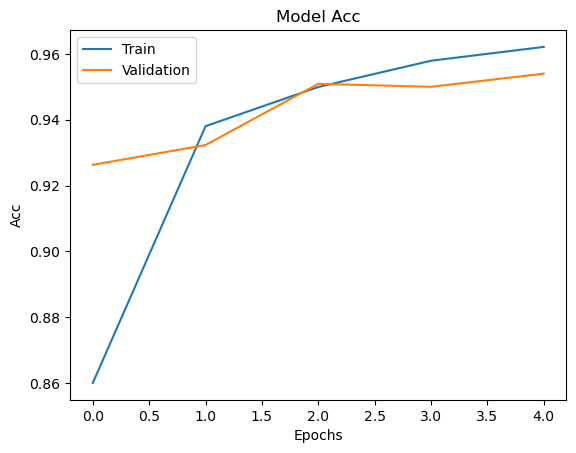

In [198]:
#Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

#Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Acc')
plt.ylabel('Acc')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

In [199]:
#Evaluate accuracy of dense layer model
dense_loss, dense_accuracy = model.evaluate(test_data_dense, test_labels_dense, verbose=0)
print('Test loss using Dense Layers:', dense_loss)
print('Test accuracy using Dense Layers:', dense_accuracy)

Test loss using Dense Layers: 0.15363028645515442
Test accuracy using Dense Layers: 0.9526000022888184


In [ ]:
############################ CNN Model ###############################

In [200]:
#vectorize training and testing data 

#Reshaping the data as to add the extra dimension '1' (number of channels) at the end to train in a CNN
train_data_cnn = train_data.reshape((60000, 28, 28,1))
train_data_cnn = train_data_cnn.astype('float32')
train_data_cnn = train_data_cnn/255.0

test_data_cnn = test_data.reshape((10000, 28, 28,1))
test_data_cnn = test_data_cnn.astype('float32')
test_data_cnn = test_data_cnn/255.0

#vectorize labels using categorical encoding
train_labels_cnn = to_categorical(train_labels)
test_labels_cnn = to_categorical(test_labels)

#Create validation set from training data (10,000 samples for validation, 50,000 for training)
train_val_cnn = train_data_cnn[:10000]
partial_train_data_cnn = train_data_cnn[10000:]
label_val_cnn = train_labels_cnn[:10000]
partial_train_labels_cnn = train_labels_cnn[10000:]

#Print length of training, validation and testing data
print("Length of training data:", len(partial_train_data_cnn))
print("Length of validation data:", len(train_val_cnn))
print("Length of testing data:", len(test_data_cnn))

Length of training data: 50000
Length of validation data: 10000
Length of testing data: 10000


In [201]:
#Build model with several convolution and pooling layers
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_191 (Conv2D)         (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_119 (MaxPooli  (None, 13, 13, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_192 (Conv2D)         (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_120 (MaxPooli  (None, 5, 5, 32)         0         
 ng2D)                                                           
                                                                 
 conv2d_193 (Conv2D)         (None, 3, 3, 32)          9248      
                                                                 
 flatten_32 (Flatten)        (None, 288)             

In [202]:
#compile model with optimizer, lr, loss, and metric
model.compile(
    optimizers.RMSprop(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [203]:
#train model for 5 epochs using a batch size of 64
history = model.fit(partial_train_data_cnn, partial_train_labels_cnn,
epochs=5, batch_size=64,
validation_data=(train_val_cnn, label_val_cnn))

Epoch 1/5
782/782 [==============================] - 6s 7ms/step - loss: 0.2464 - accuracy: 0.9245 - val_loss: 0.1307 - val_accuracy: 0.9598
Epoch 2/5
782/782 [==============================] - 5s 7ms/step - loss: 0.0675 - accuracy: 0.9789 - val_loss: 0.0678 - val_accuracy: 0.9811
Epoch 3/5
782/782 [==============================] - 5s 7ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0490 - val_accuracy: 0.9855
Epoch 4/5
782/782 [==============================] - 5s 7ms/step - loss: 0.0363 - accuracy: 0.9882 - val_loss: 0.0509 - val_accuracy: 0.9856
Epoch 5/5
782/782 [==============================] - 5s 7ms/step - loss: 0.0307 - accuracy: 0.9907 - val_loss: 0.0533 - val_accuracy: 0.9852


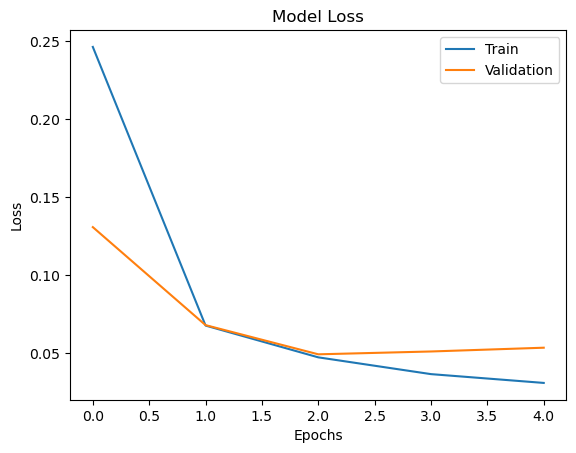

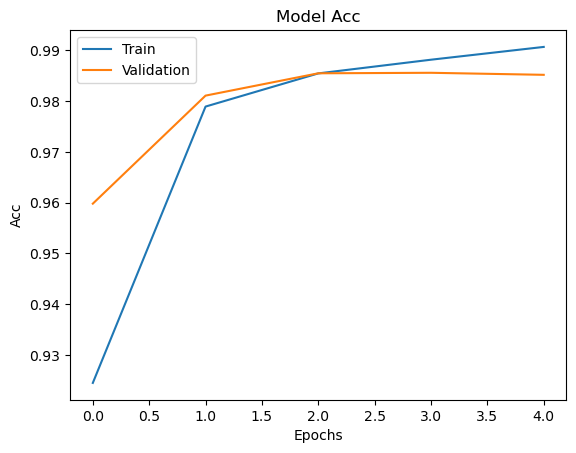

In [204]:
#Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

#Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Acc')
plt.ylabel('Acc')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

In [206]:
#Evaluate accuracy of final model
cnn_loss, cnn_accuracy = model.evaluate(test_data_cnn, test_labels_cnn, verbose=0)
print('Test loss using CNN:', cnn_loss)
print('Test accuracy using CNN:', cnn_accuracy)

Test loss using CNN: 0.03777587041258812
Test accuracy using CNN: 0.9883999824523926


In [ ]:
'''
We can see that when using the sequential model with dense layers, 
we get a test loss of 0.15 and test accuracy of 95%.

However, when we use convolution and max pooling layers, we are
able to significantly reduce the test loss to 0.04 and achieve a higher 
test accuracy of 98.8%.
'''

5.Load cifar10 dataset. Build a CNN network with convolution layers to classify the images. 

Print the accuracy.  

Tune the hyper parameters if needed to get a good accuracy. 



In [1]:
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras import models, layers, optimizers
import matplotlib.pyplot as plt

In [2]:
#Load cifar10 dataset
(train_data,train_labels),(test_data,test_labels) = cifar10.load_data()

#Print length of training and testing data and shape of images
print("Shape of training data:", train_data.shape)
print("Shape of testing data:", test_data.shape)



Shape of training data: (50000, 32, 32, 3)
Shape of testing data: (10000, 32, 32, 3)


In [3]:
#vectorize training and testing data 
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

train_data = train_data/255.0
test_data = test_data/255.0

#vectorize labels using categorical encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#Create validation set from training data (10,000 samples for validation, 40,000 for training)
train_val = train_data[:10000]
partial_train_data = train_data[10000:]
label_val = train_labels[:10000]
partial_train_labels = train_labels[10000:]

#Print length of training, validation and testing data
print("Length of training data:", len(partial_train_data))
print("Length of validation data:", len(train_val))
print("Length of testing data:", len(test_data))

Length of training data: 40000
Length of validation data: 10000
Length of testing data: 10000


In [19]:
#Build model with several convolution, pooling and normalization layers

'''
The initial model contained only a few convolution and max pooling layers without any batch normalization and dropout layers
but was only able to achieve training accuracy upto 50% and the model also overfit at times.
A deeper model as shown below with normalization and regualarization techniques such as batch norm layers and dropout layers
was created to mitigate the effect of overfitting while achieving a higher accuracy.
'''

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization()) 
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_71 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_59 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_72 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_60 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                     

In [20]:
#compile model with optimizer, lr, loss, and metric

'''
Initially, SGD optimizer was used with a learning rate of 0.01.
After hyperparameter tuning, it was found that Adam optimizer was a lr of 0.001 gave very good results
'''
model.compile(
    optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [21]:
#train model for 50 epochs using a batch size of 64
history = model.fit(partial_train_data, partial_train_labels,
epochs=50, batch_size=64,
validation_data=(train_val, label_val))

Epoch 1/50
625/625 [==============================] - 13s 17ms/step - loss: 1.5623 - accuracy: 0.4448 - val_loss: 1.3597 - val_accuracy: 0.5106
Epoch 2/50
625/625 [==============================] - 10s 16ms/step - loss: 1.0918 - accuracy: 0.6112 - val_loss: 1.0013 - val_accuracy: 0.6498
Epoch 3/50
625/625 [==============================] - 10s 16ms/step - loss: 0.9187 - accuracy: 0.6794 - val_loss: 0.7443 - val_accuracy: 0.7367
Epoch 4/50
625/625 [==============================] - 10s 16ms/step - loss: 0.8243 - accuracy: 0.7092 - val_loss: 1.0290 - val_accuracy: 0.6520
Epoch 5/50
625/625 [==============================] - 10s 16ms/step - loss: 0.7598 - accuracy: 0.7330 - val_loss: 0.7754 - val_accuracy: 0.7374
Epoch 6/50
625/625 [==============================] - 10s 16ms/step - loss: 0.7102 - accuracy: 0.7513 - val_loss: 0.6601 - val_accuracy: 0.7720
Epoch 7/50
625/625 [==============================] - 10s 16ms/step - loss: 0.6665 - accuracy: 0.7672 - val_loss: 0.6467 - val_accuracy:

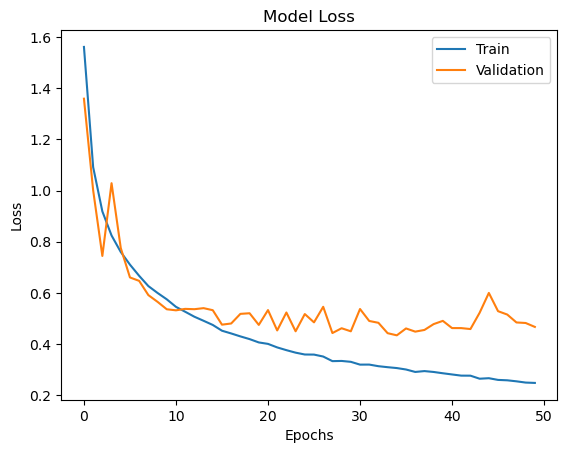

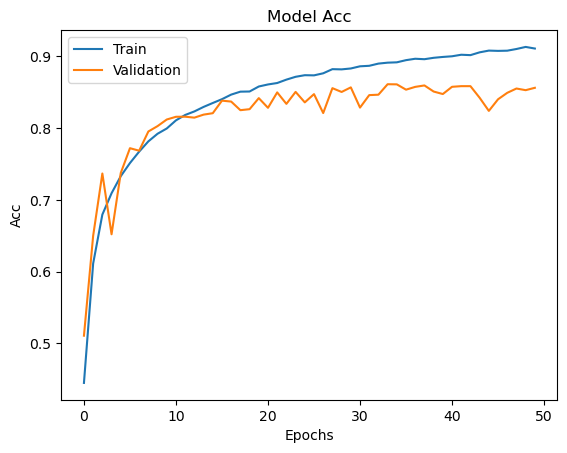

In [22]:
#Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

#Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Acc')
plt.ylabel('Acc')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

In [23]:
#Evaluate accuracy of final model on test data
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.49939215183258057
Test accuracy: 0.8514000177383423
